### Filtering Testing Notebook
Has imports and cells for loading and psuedo-streaming SSVEP data

In [4]:
import sys
sys.path.append("..")
import time
from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds, BrainFlowPresets
import numpy as np
from mvlearn.embed import CCA
import matplotlib.pyplot as plt

# Library Modules:
from modules.brainflow_stream import *
from modules.segmentation import *

from modules.brainflow_filtering import *

# from modules.filtering import *

# from modules.preprocessing import * # Old

pygame 2.6.0 (SDL 2.28.4, Python 3.8.19)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
data = np.load('simulated_test_SSVEP.npy')
data.shape

(8, 15000)

### Brainflow Filtering Test

pygame 2.6.0 (SDL 2.28.4, Python 3.8.19)
Hello from the pygame community. https://www.pygame.org/contribute.html


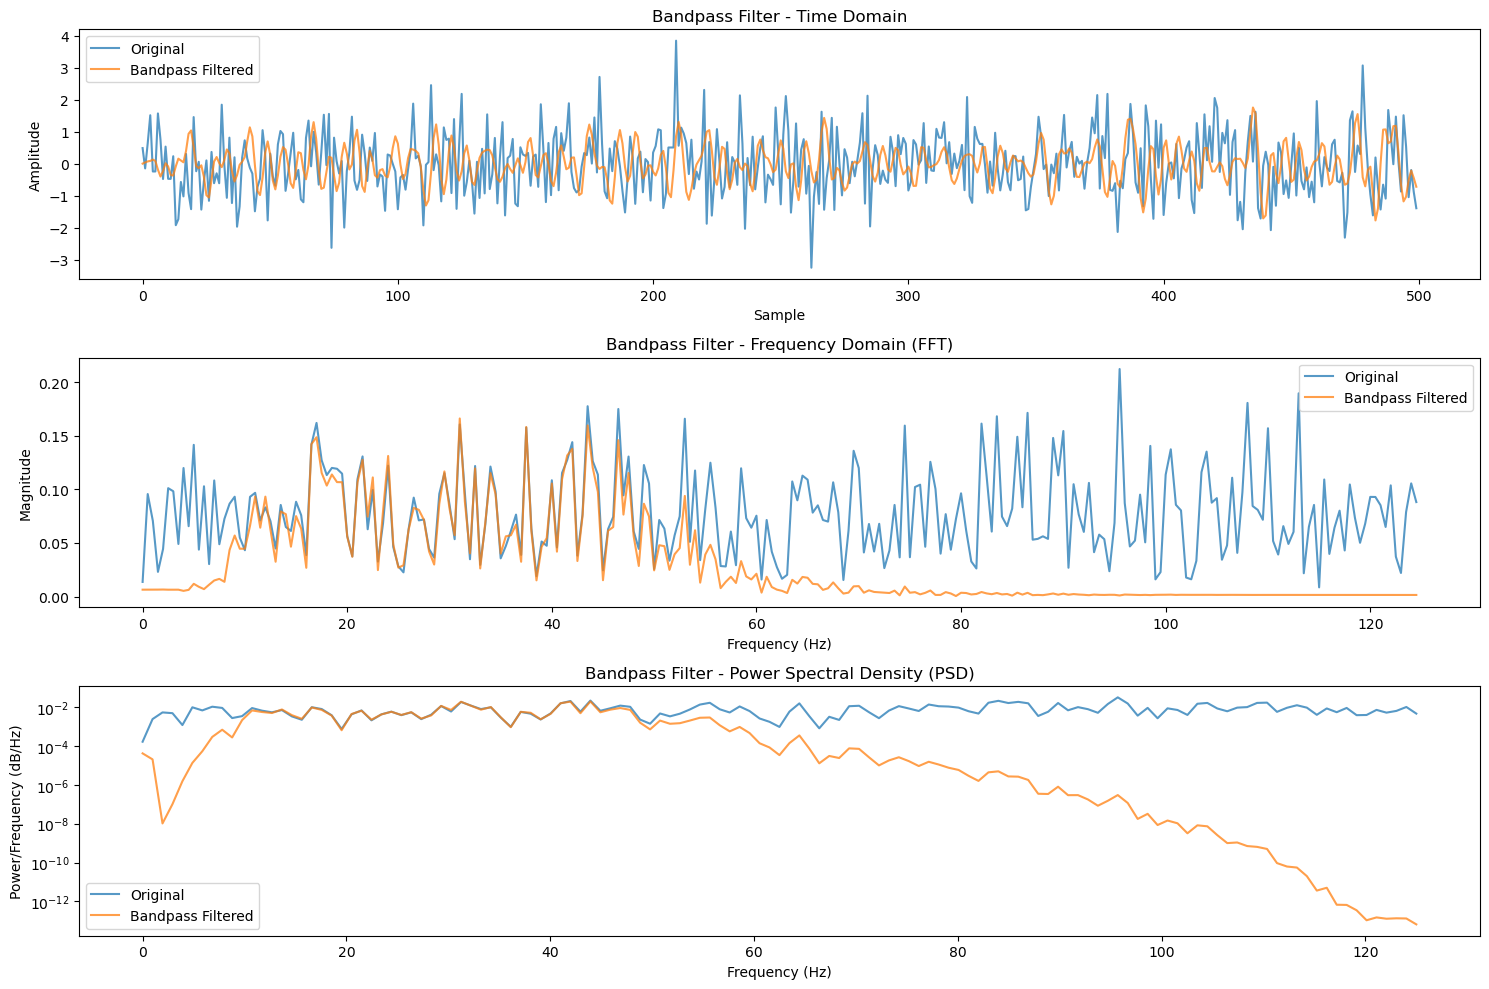

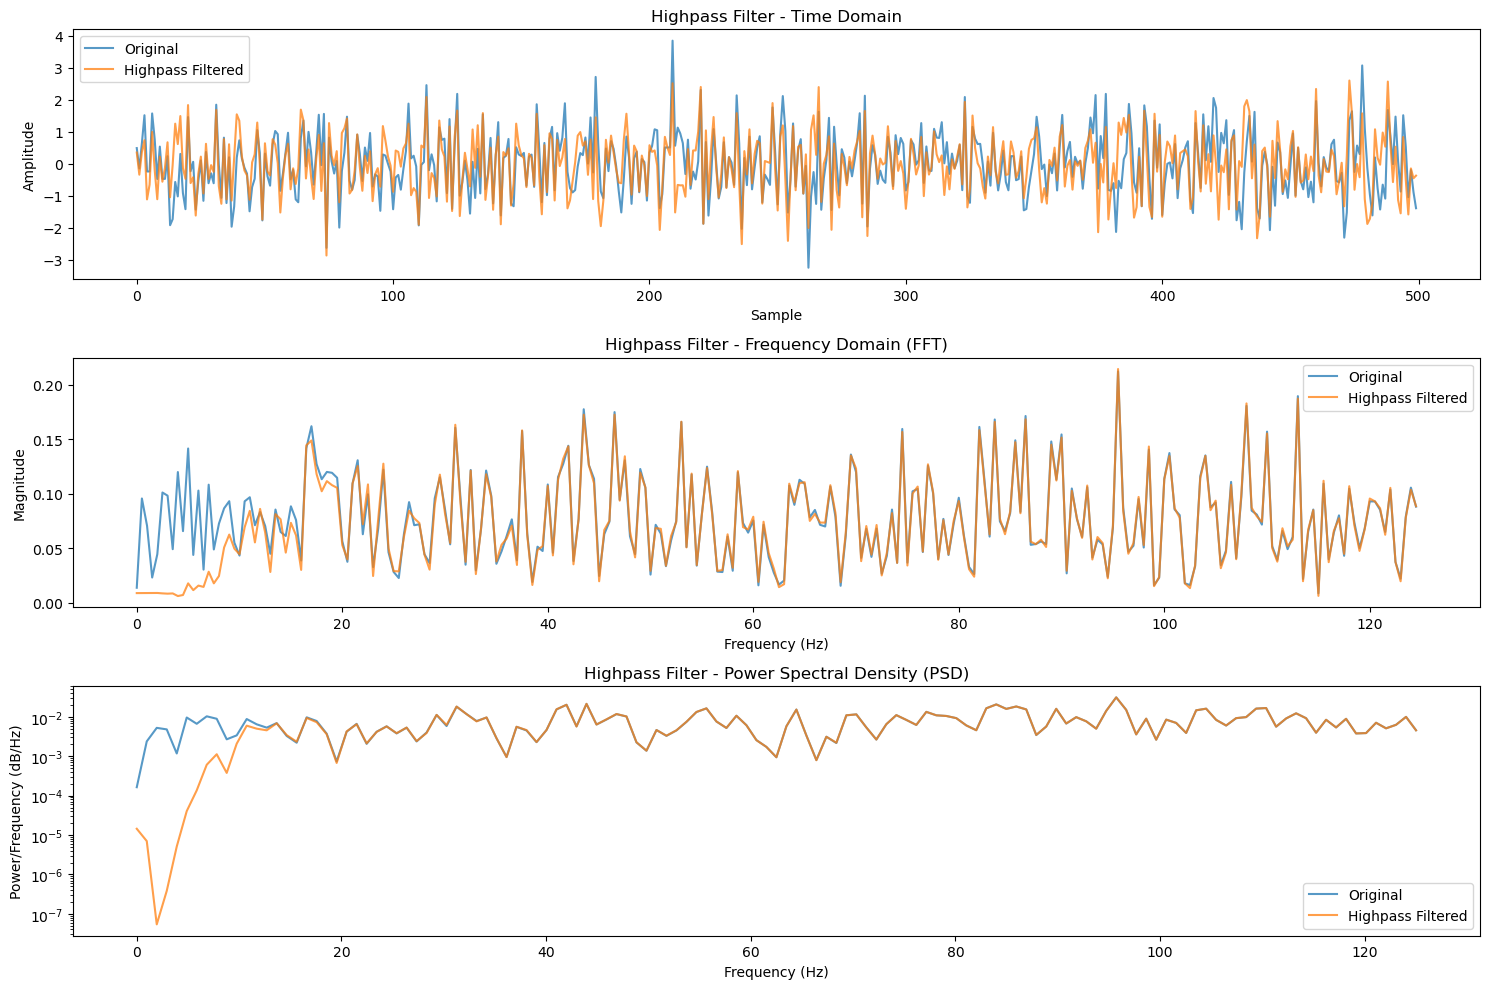

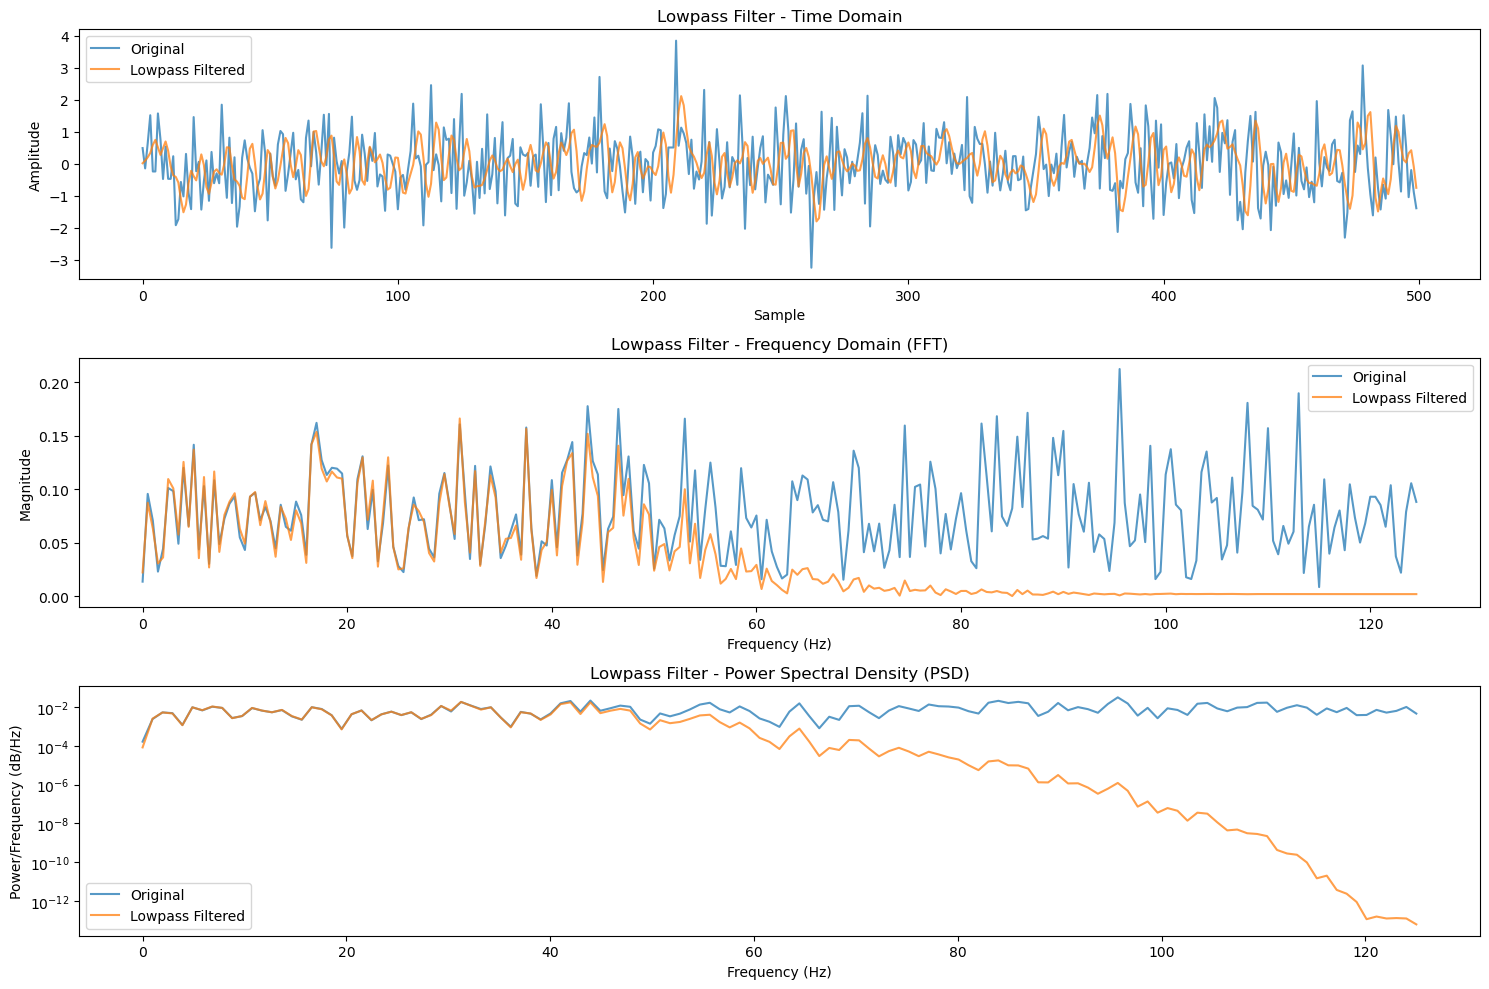

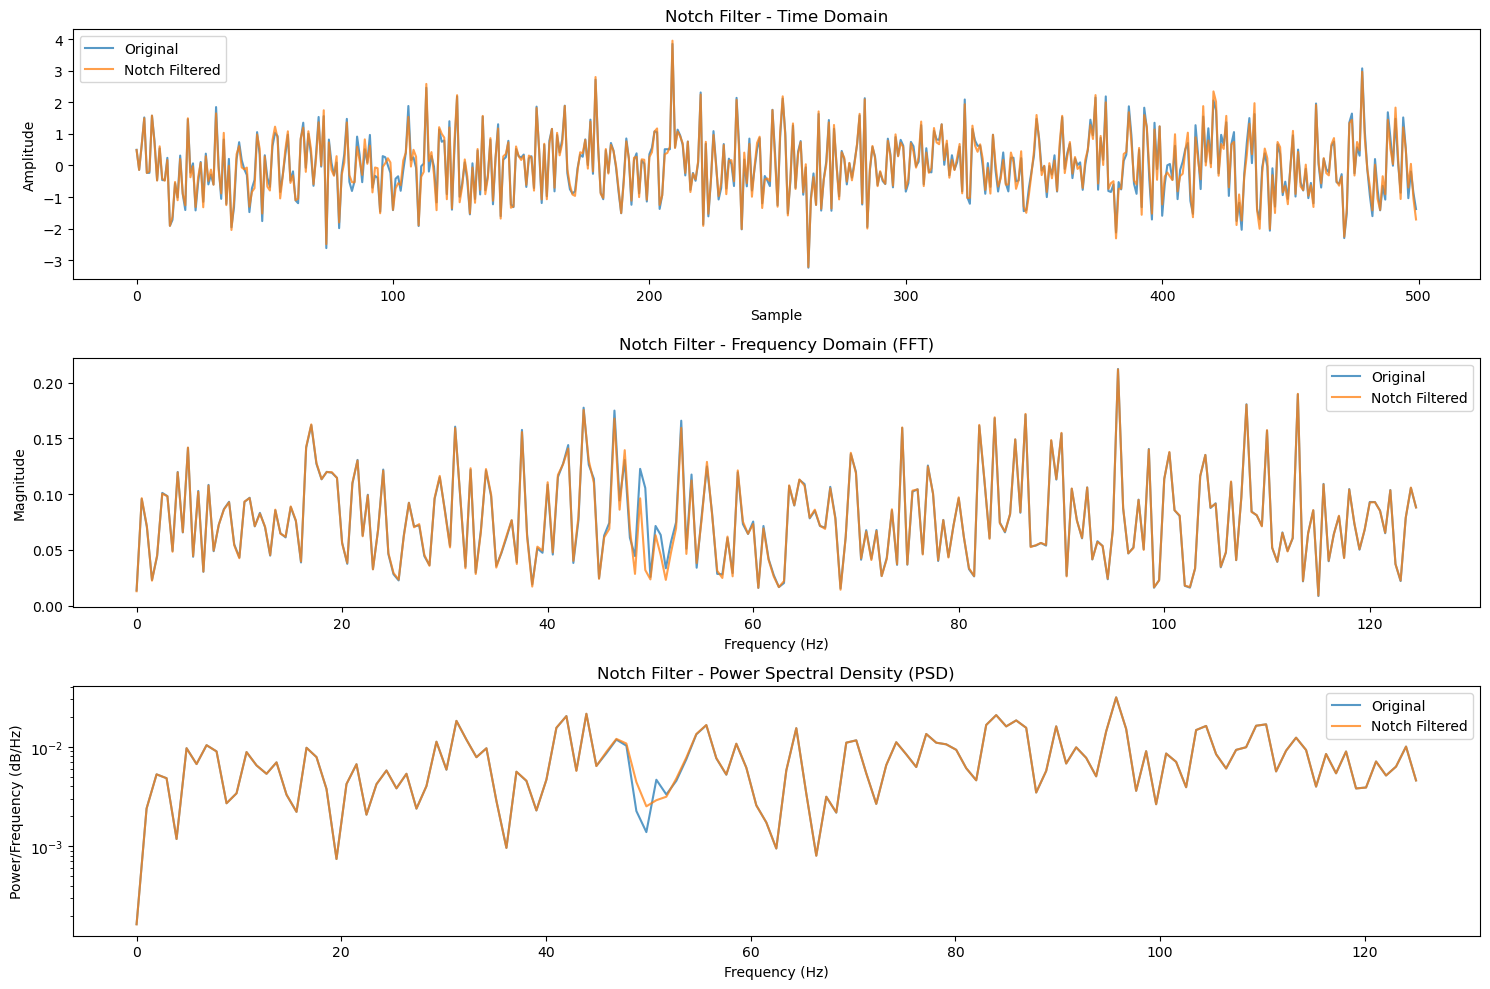

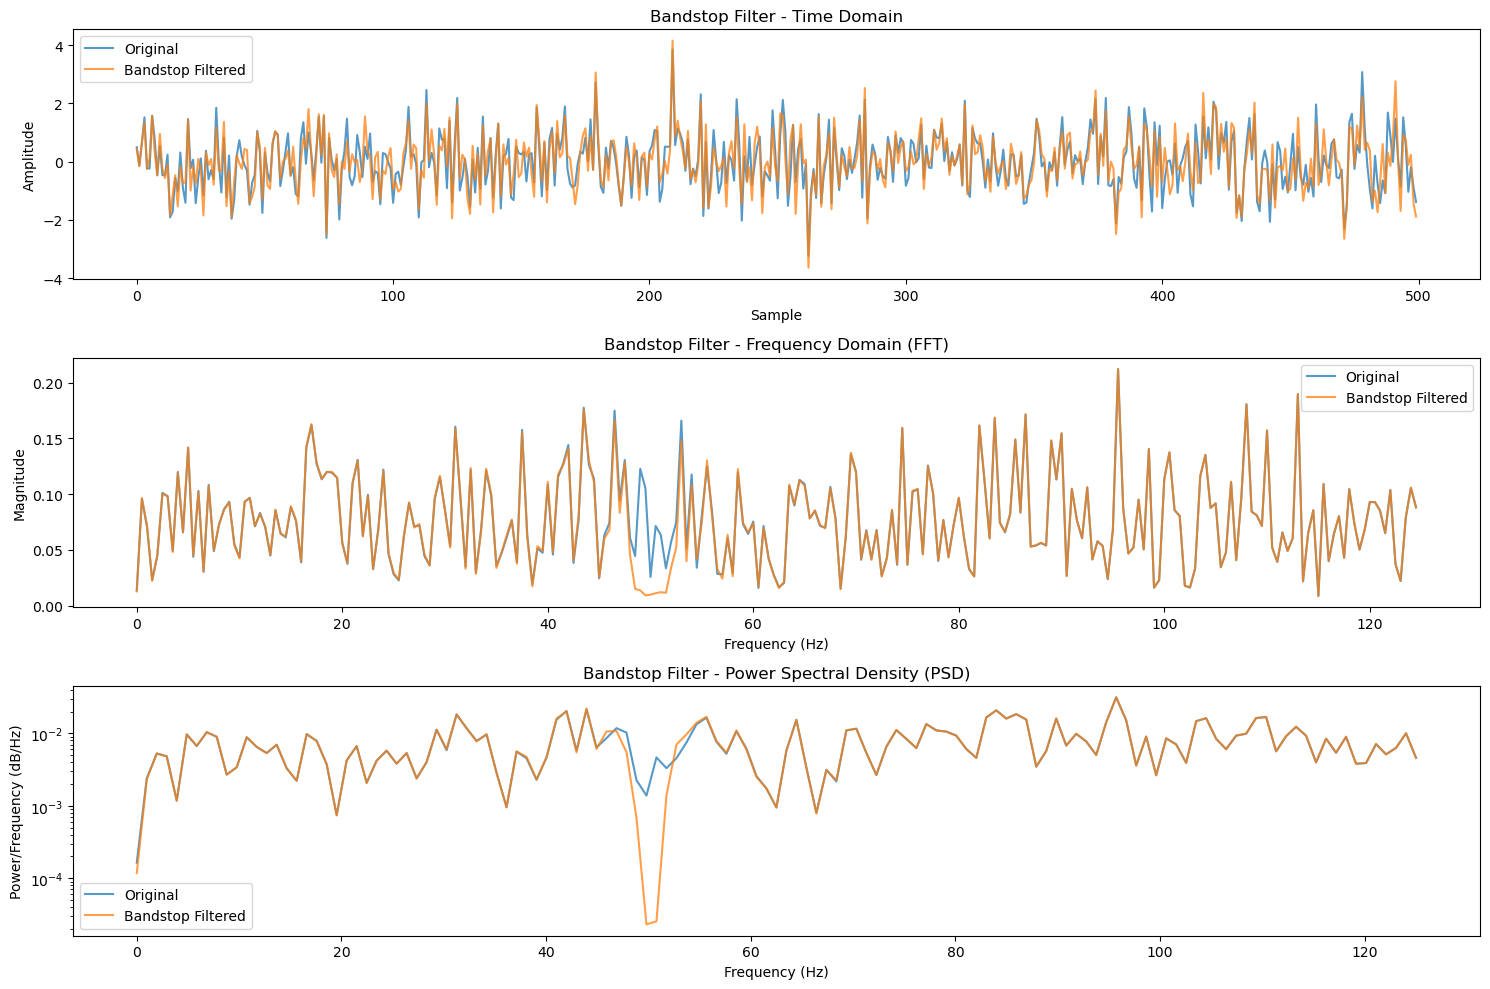

In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import welch
from modules.brainflow_filtering import *

# Assuming the Filtering class is already defined and imported
sampling_rate = 250  # Hz
filter_obj = Filtering(sampling_rate)

# Generate example EEG data (8 channels, 500 samples)
np.random.seed(42)
eeg_data = np.random.randn(8, 500)

# Define filter parameters for testing
filter_params = {
    "bandpass": {"lowcut": 10.0, "highcut": 50.0},
    "highpass": {"lowcut": 10.0},
    "lowpass": {"highcut": 50.0},
    "notch": {"notch_freq": 50.0, "quality_factor": 30.0},
    "bandstop": {"lowcut": 48.0, "highcut": 52.0}
}

# Choose a single channel to test
channel_idx = 0
original_signal = eeg_data[channel_idx].copy()  # Copy the original signal to preserve it

# Function to plot time domain and frequency domain (FFT and PSD)
def plot_validation(original, filtered, filter_type):
    plt.figure(figsize=(15, 10))

    # Time domain plot
    plt.subplot(3, 1, 1)
    plt.plot(original, label='Original', alpha=0.75)
    plt.plot(filtered, label=f'{filter_type.capitalize()} Filtered', alpha=0.75)
    plt.title(f'{filter_type.capitalize()} Filter - Time Domain')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()

    # Frequency domain plot using FFT
    plt.subplot(3, 1, 2)
    N = len(original)
    T = 1.0 / sampling_rate
    yf_original = fft(original)
    yf_filtered = fft(filtered)
    xf = fftfreq(N, T)[:N//2]

    plt.plot(xf, 2.0/N * np.abs(yf_original[:N//2]), label='Original', alpha=0.75)
    plt.plot(xf, 2.0/N * np.abs(yf_filtered[:N//2]), label=f'{filter_type.capitalize()} Filtered', alpha=0.75)
    plt.title(f'{filter_type.capitalize()} Filter - Frequency Domain (FFT)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.legend()

    # Power Spectral Density (PSD)
    plt.subplot(3, 1, 3)
    f_original, Pxx_original = welch(original, fs=sampling_rate, nperseg=256)
    f_filtered, Pxx_filtered = welch(filtered, fs=sampling_rate, nperseg=256)

    plt.semilogy(f_original, Pxx_original, label='Original', alpha=0.75)
    plt.semilogy(f_filtered, Pxx_filtered, label=f'{filter_type.capitalize()} Filtered', alpha=0.75)
    plt.title(f'{filter_type.capitalize()} Filter - Power Spectral Density (PSD)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Iterate through each filter type and validate
for filter_type, params in filter_params.items():
    # Apply the filter to the selected channel
    filtered_signal = filter_obj.filter_data(eeg_data[channel_idx:channel_idx+1].copy(), filter_type=filter_type, **params)[0]
    
    # Plot and validate
    plot_validation(original_signal, filtered_signal, filter_type)


### Other/Old Code

In [ ]:
serial_port = 'COM4' 
board_id = BoardIds.SYNTHETIC_BOARD # BoardIds.PLAYBACK_FILE_BOARD -> only if recorded with a support board (I believe...)
frequencies = [9.25, 11.25, 13.25, 15.25] # Stimulus frequencies; used for CCA & harmonic generation
buttons = ['Right', 'Left', 'Up', 'Down'] # Adds custom text to each box - must be same length as frequencies 
button_pos = [0, 2, 3, 1] # Assigns positions to custom text - must be same length as buttons
segment_duration = 4 # seconds
display = 0 # Which screen to display the stimulus paradigm on --> 0 is default

# Static Variables - Probably don't need to touch :)
harmonics = np.arange(1, 4) # Generates the 1st, 2nd, & 3rd Harmonics
sampling_rate = BoardShim.get_sampling_rate(board_id)
n_samples = sampling_rate * segment_duration 


eeg_channels = BoardShim.get_eeg_names(board_id)
channel_names = ["O1", "O2", "Oz", "Pz", "P3", "P4", "POz", "P1"]
channel_mapping = dict(zip(eeg_channels, channel_names))

# Show board information
print(f"Sampling Rate: {sampling_rate}")
print(f"Default Channels: {eeg_channels}")
print(f"Channel Mapping: {channel_mapping}")

board = BrainFlowBoardSetup(board_id, serial_port)
# board.show_params() # Logger shows this info by default - this is another method to show
board.setup()

In [6]:
board.stop()


Streaming stopped
Session released
